# WeatherPy

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [57]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


In [58]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fale old settlement
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | hassi messaoud
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | lockwood
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | weno
Processing Record 12 of Set 1 | sungai besar
Processing Record 13 of Set 1 | chibougamau
Processing Record 14 of Set 1 | luanda
Processing Record 15 of Set 1 | talcahuano
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | bayanhongor
Processing Record 21 of Set 1 | 

Processing Record 40 of Set 4 | nuku'alofa
Processing Record 41 of Set 4 | dhidhdhoo
Processing Record 42 of Set 4 | vernon
Processing Record 43 of Set 4 | krutinka
Processing Record 44 of Set 4 | el calafate
Processing Record 45 of Set 4 | polyarnyy
Processing Record 46 of Set 4 | ghazni
Processing Record 47 of Set 4 | kroya
Processing Record 48 of Set 4 | tazovsky
Processing Record 49 of Set 4 | itamaraca
Processing Record 0 of Set 5 | tolanaro
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | la concepcion de los banos
Processing Record 3 of Set 5 | khurba
Processing Record 4 of Set 5 | yelizavetinskaya
Processing Record 5 of Set 5 | birjand
Processing Record 6 of Set 5 | beau vallon
Processing Record 7 of Set 5 | point fortin
Processing Record 8 of Set 5 | oriximina
Processing Record 9 of Set 5 | carora
Processing Record 10 of Set 5 | hemsby
Processing Record 11 of Set 5 | college
Processing Record 12 of Set 5 | saint-philippe
Processing Record 13 of Set 5 | burutu

Processing Record 29 of Set 8 | metlili chaamba
Processing Record 30 of Set 8 | mabaruma
Processing Record 31 of Set 8 | porto novo
Processing Record 32 of Set 8 | nishon tumani
Processing Record 33 of Set 8 | bundibugyo
Processing Record 34 of Set 8 | gadzhiyevo
Processing Record 35 of Set 8 | fauske
Processing Record 36 of Set 8 | lompoc
Processing Record 37 of Set 8 | shakawe
Processing Record 38 of Set 8 | piti village
Processing Record 39 of Set 8 | jianshui
Processing Record 40 of Set 8 | guerrero negro
Processing Record 41 of Set 8 | happy valley-goose bay
Processing Record 42 of Set 8 | subusub
Processing Record 43 of Set 8 | ordos
City not found. Skipping...
Processing Record 44 of Set 8 | crane
Processing Record 45 of Set 8 | ceres
Processing Record 46 of Set 8 | sandnessjoen
Processing Record 47 of Set 8 | banyo
Processing Record 48 of Set 8 | darwin
Processing Record 49 of Set 8 | figuig (centre)
Processing Record 0 of Set 9 | boac
Processing Record 1 of Set 9 | chaihe
Proc

Processing Record 15 of Set 12 | aguililla
Processing Record 16 of Set 12 | bandarbeyla
Processing Record 17 of Set 12 | puerto deseado
Processing Record 18 of Set 12 | palu
Processing Record 19 of Set 12 | tagbilaran city
Processing Record 20 of Set 12 | antioch
Processing Record 21 of Set 12 | caconda
Processing Record 22 of Set 12 | marsabit
Processing Record 23 of Set 12 | chonchi
Processing Record 24 of Set 12 | st. albert
Processing Record 25 of Set 12 | xinqing
Processing Record 26 of Set 12 | amasra
Processing Record 27 of Set 12 | otaru
Processing Record 28 of Set 12 | barra de santo antonio
Processing Record 29 of Set 12 | aripuana
Processing Record 30 of Set 12 | zhaotong
Processing Record 31 of Set 12 | san jose village
City not found. Skipping...
Processing Record 32 of Set 12 | springhill
Processing Record 33 of Set 12 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 34 of Set 12 | oarai
Processing Record 35 of Set 12 | mugia
Processi

In [60]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [61]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fale old settlement,-9.3852,-171.2468,28.63,75,88,4.54,TK,1689908719
1,blackmans bay,-43.0167,147.3167,11.40,59,3,2.45,AU,1689908719
2,yellowknife,62.4560,-114.3525,26.29,44,100,4.12,CA,1689908719
3,bilibino,68.0546,166.4372,23.36,45,3,2.19,RU,1689908720
4,hassi messaoud,31.6804,6.0729,32.92,10,0,1.54,DZ,1689908720


In [62]:
import os

# Create the 'output_data' directory if it doesn't exist
if not os.path.exists('output_data'):
    os.makedirs('output_data')

# Save the DataFrame to a CSV file in the 'output_data' directory
output_file = 'output_data/city_weather_data.csv'
city_data_df.to_csv(output_file, index=False)

In [64]:
# Read saved data
city_data_df = pd.read_csv('output_data/city_weather_data.csv', index_col="City")

# Display sample data
city_data_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
fale old settlement,-9.3852,-171.2468,28.63,75,88,4.54,TK,1689908719
blackmans bay,-43.0167,147.3167,11.40,59,3,2.45,AU,1689908719
yellowknife,62.4560,-114.3525,26.29,44,100,4.12,CA,1689908719
bilibino,68.0546,166.4372,23.36,45,3,2.19,RU,1689908720
hassi messaoud,31.6804,6.0729,32.92,10,0,1.54,DZ,1689908720


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

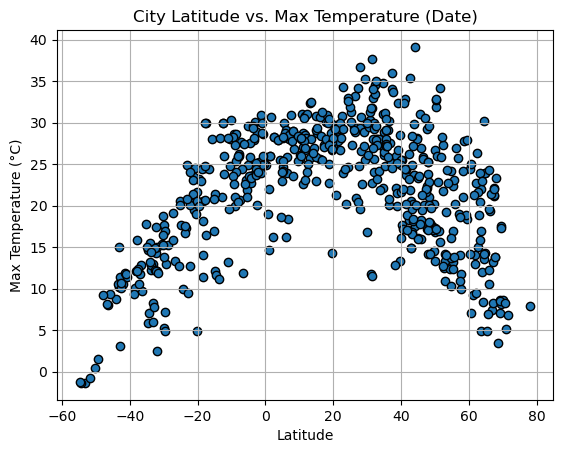

In [65]:
import matplotlib.pyplot as plt

# Assuming you have already created the city_data_df DataFrame with 'Lat' and 'Max Temp' columns

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (Date)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

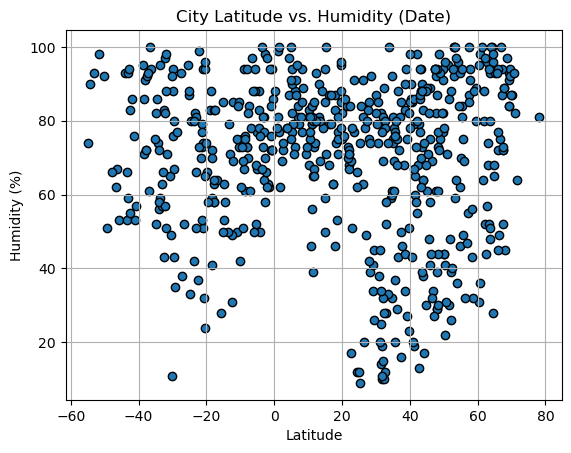

In [66]:
import matplotlib.pyplot as plt

# Assuming you have already created the city_data_df DataFrame with 'Lat' and 'Humidity' columns

# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (Date)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

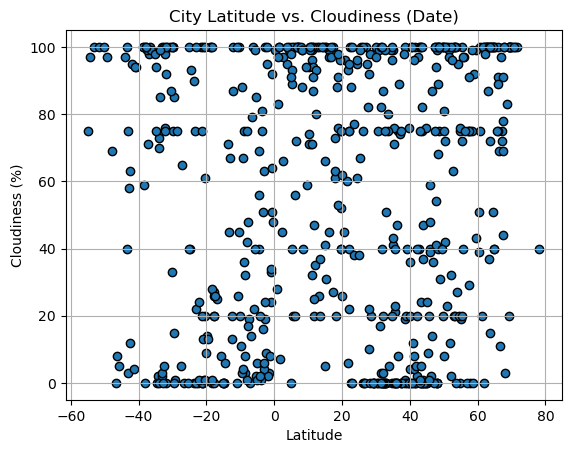

In [67]:
import matplotlib.pyplot as plt

# Assuming you have already created the city_data_df DataFrame with 'Lat' and 'Cloudiness' columns

# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (Date)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

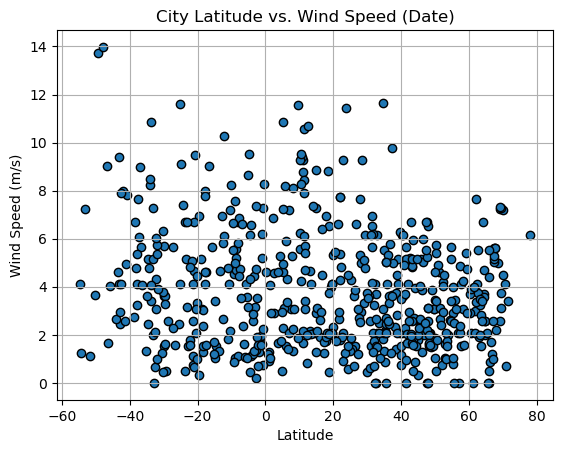

In [68]:
import matplotlib.pyplot as plt

# Assuming you have already created the city_data_df DataFrame with 'Lat' and 'Wind Speed' columns

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (Date)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship

In [80]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def create_scatter_plot_with_regression(x, y, x_label, y_label, title, save_file_name=None):
    """
    Create a scatter plot with linear regression.

    Parameters:
        x (list or array): The x-axis data.
        y (list or array): The y-axis data.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        title (str): Title of the plot.
        save_file_name (str, optional): If provided, the plot will be saved with this filename.

    Returns:
        None
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = [slope * xi + intercept for xi in x]

    # Create scatter plot
    plt.scatter(x, y, marker='o', edgecolors='black')

    # Plot the regression line
    plt.plot(x, regression_line, color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add the model's formula and R-squared value to the plot
    plt.text(min(x), max(y), f"y = {slope:.2f}x + {intercept:.2f}", fontsize=12, color='blue')
    plt.text(min(x), max(y) - (max(y) - min(y)) * 0.1, f"R² = {r_value**2:.2f}", fontsize=12, color='blue')

    # Add legend
    plt.legend()

    # Show the plot or save it if a filename is provided
    if save_file_name:
        plt.savefig(save_file_name)
    else:
        plt.show()

In [81]:
# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
yellowknife,62.4560,-114.3525,26.29,44,100,4.12,CA,1689908719
bilibino,68.0546,166.4372,23.36,45,3,2.19,RU,1689908720
hassi messaoud,31.6804,6.0729,32.92,10,0,1.54,DZ,1689908720
lockwood,45.8191,-108.4149,26.94,41,40,5.14,US,1689908720
weno,7.4515,151.8468,30.97,79,100,3.09,FM,1689908720


In [82]:
# Create a DataFrame with Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
fale old settlement,-9.3852,-171.2468,28.63,75,88,4.54,TK,1689908719
blackmans bay,-43.0167,147.3167,11.40,59,3,2.45,AU,1689908719
east london,-33.0153,27.9116,12.93,57,100,7.26,ZA,1689908223
adamstown,-25.0660,-130.1015,20.51,87,100,11.61,PN,1689908720
port lincoln,-34.7333,135.8667,14.68,52,94,5.17,AU,1689908720


###  Temperature vs. Latitude Linear Regression Plot

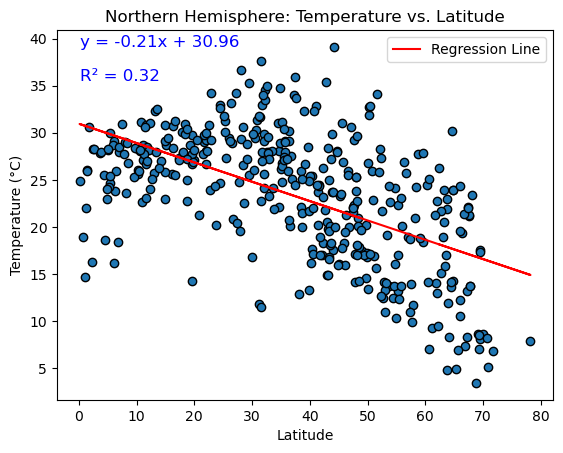

In [85]:
# Northern Hemisphere: Temperature vs. Latitude
create_scatter_plot_with_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                                    'Latitude', 'Temperature (°C)', 'Northern Hemisphere: Temperature vs. Latitude',
                                    'output_data/northern_temperature_regression_plot.png')

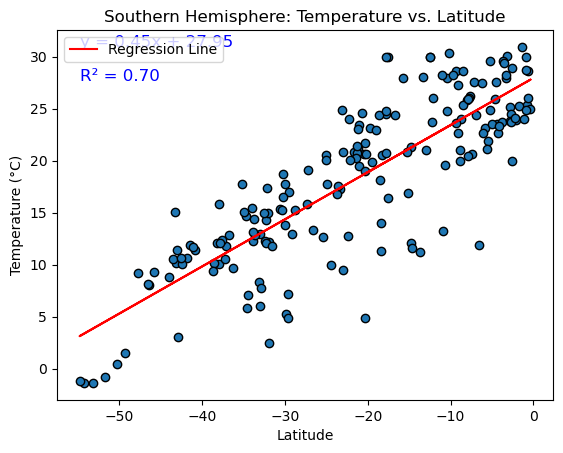

In [86]:
# Southern Hemisphere: Temperature vs. Latitude
create_scatter_plot_with_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                                    'Latitude', 'Temperature (°C)', 'Southern Hemisphere: Temperature vs. Latitude',
                                    'output_data/southern_temperature_regression_plot.png')


### Humidity vs. Latitude Linear Regression Plot

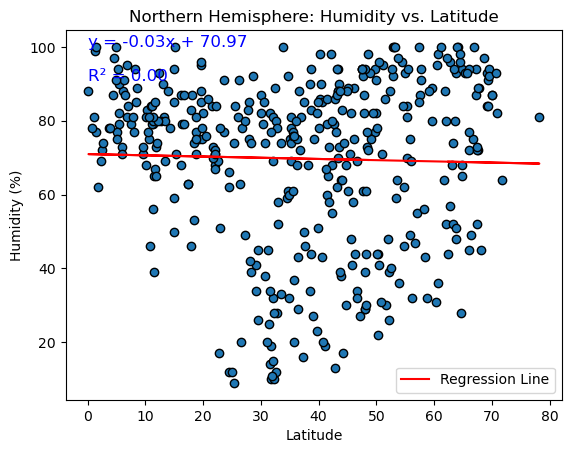

In [87]:
# Northern Hemisphere: Humidity vs. Latitude
create_scatter_plot_with_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                                    'Latitude', 'Humidity (%)', 'Northern Hemisphere: Humidity vs. Latitude',
                                    'output_data/northern_humidity_regression_plot.png')

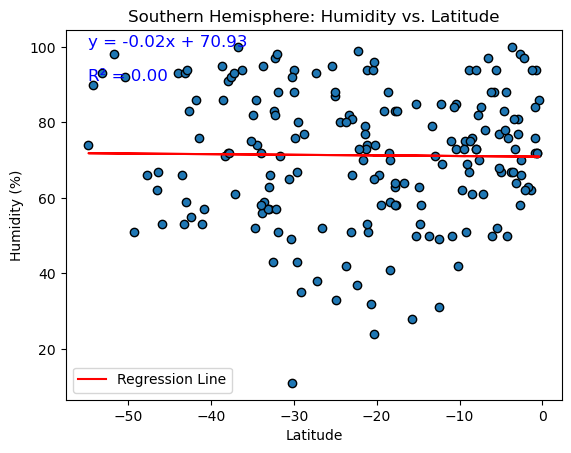

In [88]:
# Southern Hemisphere: Humidity vs. Latitude
create_scatter_plot_with_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                                    'Latitude', 'Humidity (%)', 'Southern Hemisphere: Humidity vs. Latitude',
                                    'output_data/southern_humidity_regression_plot.png')

### Cloudiness vs. Latitude Linear Regression Plot

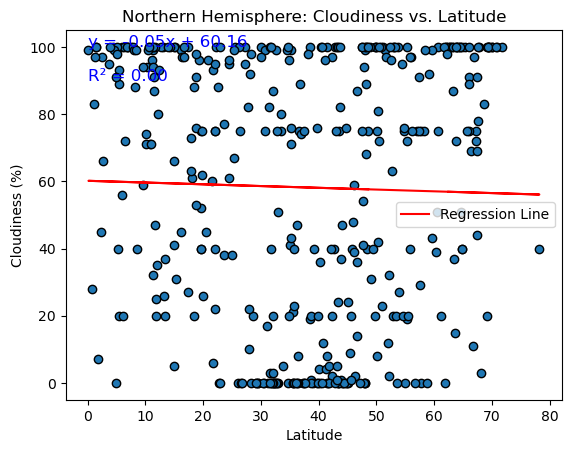

In [89]:
# Northern Hemisphere: Cloudiness vs. Latitude
create_scatter_plot_with_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                                    'Latitude', 'Cloudiness (%)', 'Northern Hemisphere: Cloudiness vs. Latitude',
                                    'output_data/northern_cloudiness_regression_plot.png')

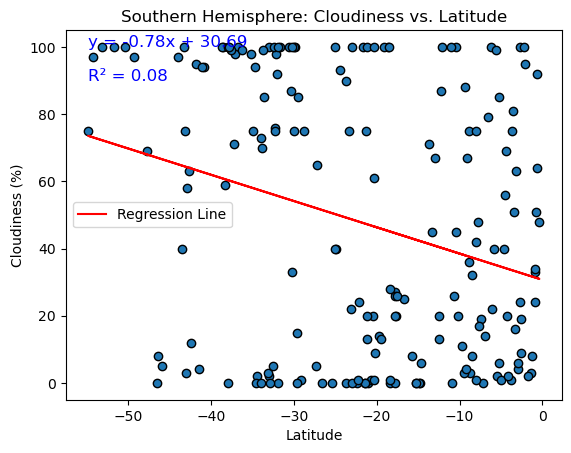

In [90]:
# Southern Hemisphere: Cloudiness vs. Latitude
create_scatter_plot_with_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                                    'Latitude', 'Cloudiness (%)', 'Southern Hemisphere: Cloudiness vs. Latitude',
                                    'output_data/southern_cloudiness_regression_plot.png')

### Wind Speed vs. Latitude Linear Regression Plot

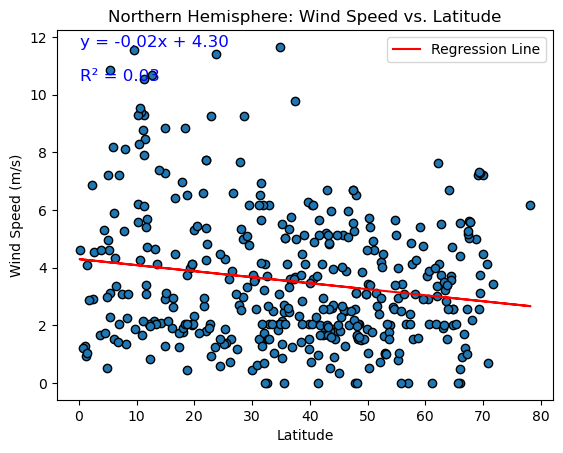

In [91]:
# Northern Hemisphere: Wind Speed vs. Latitude
create_scatter_plot_with_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                                    'Latitude', 'Wind Speed (m/s)', 'Northern Hemisphere: Wind Speed vs. Latitude',
                                    'output_data/northern_wind_speed_regression_plot.png')

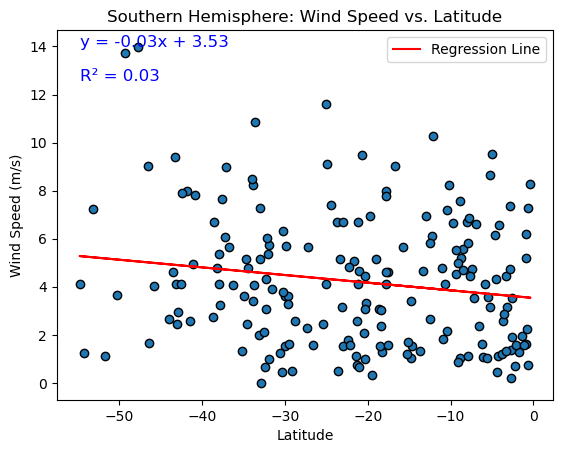

In [92]:
# Southern Hemisphere: Wind Speed vs. Latitude
create_scatter_plot_with_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                                    'Latitude', 'Wind Speed (m/s)', 'Southern Hemisphere: Wind Speed vs. Latitude',
                                    'output_data/southern_wind_speed_regression_plot.png')